# Water Quality Detection

### 1. Import libraries needed

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

import pandas as pd
import seaborn as sns

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 2. Load data

In [2]:
df = pd.read_csv("all_classes.csv", header=0)
df

,filename,Clean
0,images15_jpg.rf.2fbeed7fcd8400d3594753246487ed...,0
1,533138_jpg.rf.a8051d381a1898c69b2aceb61a257489...,0
2,nice-beach-clean-sea_jpg.rf.394ff193a778679cbc...,1
3,1_jpg.rf.8bf1452b5e06580f7861942640716267.jpg,0
4,background-sand-on-beach-underwater-260nw-3373...,1
...,...,...
322,istockphoto-1394890414-612x612l.jpg,1
323,istockphoto-2008314823-612x612s,0
324,istockphoto-2008314823-612x612l.jpg,0
325,istockphoto-2008314823-612x612m.jpg,0


In [3]:
def preprocess_image(image, desired_width, desired_height):
    image = cv2.resize(image, (desired_width, desired_height))
    image = image / 255.0
    return image

In [4]:
desired_width = 256
desired_height = 256

source_dir = "source1/"

images = []
labels = []

for image in os.listdir(source_dir):
    if image.endswith(".jpg") or image.endswith(".jpeg") or image.endswith(".png"):

        image_path = os.path.join(source_dir, image)
        img = cv2.imread(image_path)
        img = preprocess_image(
            image=img, desired_width=desired_width, desired_height=desired_height
        )

        label = df.loc[df["filename"] == image, "Clean"].values
        if len(label) > 0:
            images.append(img)
            labels.append(label[0])
        else:
            continue

# Mengubah list gambar dan label menjadi array numpy
images_array = np.array(images)
labels_array = np.array(labels)

In [5]:
print(labels_array.shape)

(120,)


### 3. Split data to training and testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    images_array, labels_array, test_size=0.2, random_state=42
)

### 4. Augmentasi gambar

In [7]:
# Inisialisasi ImageDataGenerator untuk augmentasi data gambar
datagen = ImageDataGenerator(
    rotation_range=20,  # Rentang rotasi gambar (dalam derajat)
    width_shift_range=0.1,  # Rentang pergeseran horizontal
    height_shift_range=0.1,  # Rentang pergeseran vertikal
    shear_range=0.2,  # Rentang pergeseran sudut shear
    zoom_range=0.2,  # Rentang zoom-in dan zoom-out
    horizontal_flip=True,  # Memutar gambar secara horizontal
    vertical_flip=False,  # Memutar gambar secara vertikal
    fill_mode="nearest",  # Metode pengisian untuk piksel yang baru diciptakan
)

### 5. Arsitektur model

In [18]:
# Membuat model CNN
model = Sequential(
    [
        Conv2D(
            32,
            (3, 3),
            activation="relu",
            input_shape=(desired_height, desired_width, 3),
        ),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

batch_size = 16
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=30,
    validation_data=(X_test, y_test),
)

c:\Users\ASUS\anaconda3\envs\cuda-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


c:\Users\ASUS\anaconda3\envs\cuda-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 831ms/step - accuracy: 0.6356 - loss: 0.7077 - val_accuracy: 0.8750 - val_loss: 0.5600
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 670ms/step - accuracy: 0.8631 - loss: 0.5478 - val_accuracy: 0.8750 - val_loss: 0.3904
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 0.8570 - loss: 0.4439 - val_accuracy: 0.8750 - val_loss: 0.3234
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 632ms/step - accuracy: 0.8234 - loss: 0.3973 - val_accuracy: 0.8333 - val_loss: 0.3322
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 538ms/step - accuracy: 0.8461 - loss: 0.4092 - val_accuracy: 0.8750 - val_loss: 0.2951
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step - accuracy: 0.8436 - loss: 0.3819 - val_accuracy: 0.8333 - val_loss: 0.2987
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 539ms/step - accuracy: 0.8754 - loss: 0.3705 - val_accuracy: 0.8750 - val_loss: 0.2743
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 567ms/step - accuracy: 0.7829 - loss: 0.4549 - val_accuracy: 0.9167 - val_loss: 0.2894
Ep

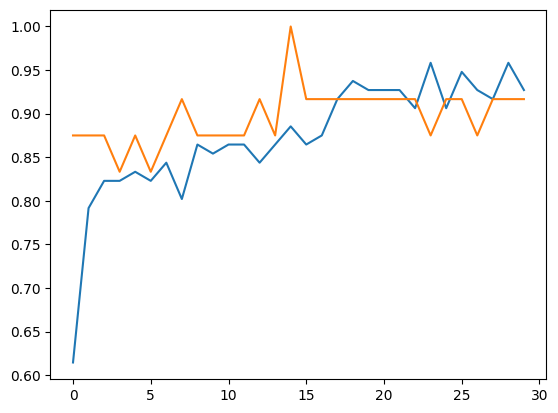

In [19]:
plt.figure()
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.show()

### 6. Testing

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.9167 - loss: 0.1825
Test loss: 0.1824776530265808
Test accuracy: 91.66666865348816%


In [21]:
image = np.expand_dims(X_test, axis=0)  # Add batch dimension
image = image / 255.0  # Normalize pixel values

prediction = model.predict(X_test)
predicted_label = (prediction > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


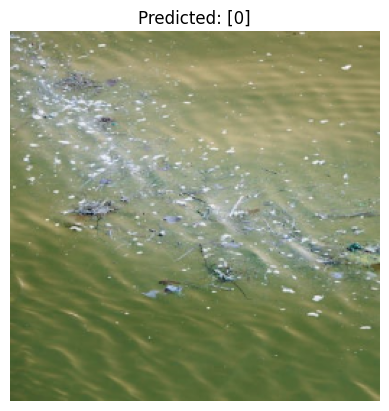

In [22]:
index_image = 6
plt.imshow(X_test[index_image])
plt.axis(False)
plt.title(f"Predicted: {predicted_label[index_image]}")
plt.show()

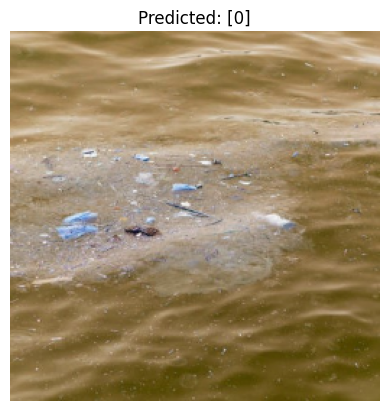

In [23]:
index_image = 8
plt.imshow(X_test[index_image])
plt.axis(False)
plt.title(f"Predicted: {predicted_label[index_image]}")
plt.show()

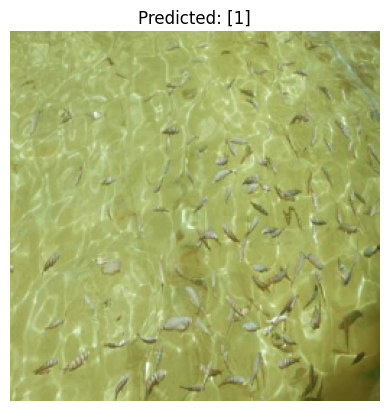

In [24]:
index_image = 2
plt.imshow(X_test[index_image])
plt.axis(False)
plt.title(f"Predicted: {predicted_label[index_image]}")
plt.show()

Text(113.9222222222222, 0.5, 'predicted class')

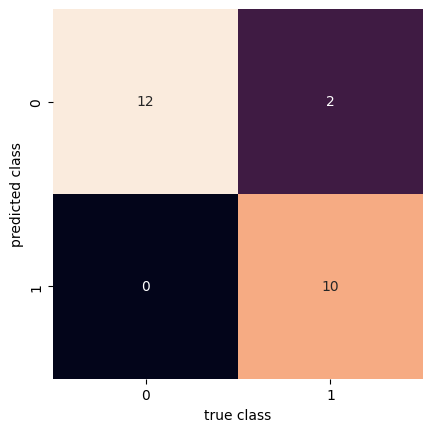

In [25]:
conmat = confusion_matrix(y_test, predicted_label)
sns.heatmap(conmat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true class")
plt.ylabel("predicted class")

### 7. Save Model

In [26]:
model.save("clean-water.h5")

In [28]:
model = tf.keras.models.load_model("clean-water.h5")

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("your_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpq3ljpzk6\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpq3ljpzk6\assets


: 